# Analysis of 16-18 Local Authority Level Destinations
This notebook provides a comprehensive analysis of the '16-18 Local Authority Level Destinations' dataset, published by the UK Government and accessible via the Explore Education Statistics platform: https://explore-education-statistics.service.gov.uk/data-catalogue. The dataset is available under the Open Government License: https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/.

The aim of the analysis is to examine the destinations of students aged 16-18 in England, upon completing their education. This is broken down by various categories, such as the destination type.

## Importing Modules

The below modules were imported and utilised within the Python notebook.

In [ ]:
import pandas as pd # Data handling and manipulation
import geopandas as gpd # Choropleth mapping
import seaborn as sns # Charting and data visualisation
import matplotlib.pyplot as plt # Further charting functionality

## Data Retrieval

The '16-18 local authority level destinations.csv' file was downloaded and imported into the notebook as a Pandas dataframe.

In [ ]:
destinations_df = pd.read_csv('/work/16-18 local authority level destinations.csv') # Read CSV as Pandas dataframe
destinations_df.head(10) # Preview top 10 rows

/tmp/ipykernel_414/3374349162.py:2: DtypeWarning: Columns (12,13,14,15,25,26,27,28,29,34,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  destinations_df = pd.read_csv('/work/16-18 local authority level destinations.csv') # Read CSV as Pandas dataframe


,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,old_la_code,new_la_code,la_name,...,fel2,fel1,other_edu,appren,appl4,appl3,appl2,all_work,all_notsust,all_unknown
0,201011,Academic year,Local authority,E92000001,England,E12000001,North East,805.0,E06000001,Hartlepool,...,z,z,6,8.0,0,2.0,6.0,11.0,13.0,1.0
1,201011,Academic year,Local authority,E92000001,England,E12000001,North East,805.0,E06000001,Hartlepool,...,z,z,35,74.0,0,43.0,31.0,83.0,73.0,7.0
2,201011,Academic year,Local authority,E92000001,England,E12000001,North East,805.0,E06000001,Hartlepool,...,z,z,11,2.0,0,1.0,1.0,15.0,16.0,0.0
3,201011,Academic year,Local authority,E92000001,England,E12000001,North East,805.0,E06000001,Hartlepool,...,z,z,40,68.0,0,42.0,26.0,87.0,76.0,6.0
4,201011,Academic year,Local authority,E92000001,England,E12000001,North East,805.0,E06000001,Hartlepool,...,z,z,0,2.0,0,1.0,1.0,1.0,0.0,0.0
5,201011,Academic year,Local authority,E92000001,England,E12000001,North East,805.0,E06000001,Hartlepool,...,z,z,2,1.0,0,1.0,0.0,1.0,2.0,4.0
6,201011,Academic year,Local authority,E92000001,England,E12000001,North East,805.0,E06000001,Hartlepool,...,z,z,44,73.0,0,42.0,31.0,95.0,86.0,3.0
7,201011,Academic year,Local authority,E92000001,England,E12000001,North East,805.0,E06000001,Hartlepool,...,z,z,0,0.0,0,0.0,0.0,1.0,1.0,0.0
8,201011,Academic year,Local authority,E92000001,England,E12000001,North East,805.0,E06000001,Hartlepool,...,z,z,9.2,12.3,0.0,3.1,9.2,16.9,20.0,1.5
9,201011,Academic year,Local authority,E92000001,England,E12000001,North East,805.0,E06000001,Hartlepool,...,z,z,7.3,15.4,0.0,8.9,6.4,17.3,15.2,1.5


## Exploratory Analysis
A cursory exploration of the data was conducted to assess its contents in preparation for cleansing and further analysis.

### Inspecting destinations_df Dimensions

The dimensions of destinations_df was inspected to compare the number of tuples and attributes to '16-18 local authority level destinations.csv' and assess the overall size of the dataset.

In [ ]:
destinations_df.shape

(533794, 41)

533,794 rows and 41 columns were retrieved, this is correct when matching against '16-18 local authority level destinations.csv'. Unneeded columns and rows will be dropped during data cleansing.

### Examining destinations_df Information

A summary of the key information pertaining to destinations_df was printed to identify any areas needing action.

In [ ]:
destinations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533794 entries, 0 to 533793
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   time_period            533794 non-null  int64  
 1   time_identifier        533794 non-null  object 
 2   geographic_level       533794 non-null  object 
 3   country_code           533794 non-null  object 
 4   country_name           533794 non-null  object 
 5   region_code            533794 non-null  object 
 6   region_name            533794 non-null  object 
 7   old_la_code            294694 non-null  float64
 8   new_la_code            294694 non-null  object 
 9   la_name                294694 non-null  object 
 10  pcon_code              27914 non-null   object 
 11  pcon_name              27914 non-null   object 
 12  lad_code               180620 non-null  object 
 13  lad_name               180620 non-null  object 
 14  opportunity_area_code  1800 non-null

This revealed that several column names are not descriptive of their purpose, such as 'fel1'. To action this, the data-guidance.txt file, supplied with the dataset, will be refered to as this contains descriptions of each column; these columns will be renamed to enhance clarity as part of the data cleansing process.

Additionally, this showed that numerous attributes were assigned incorrect data types. For instance, 'cohort' was set to data type 'object', despite containing numerical values. The reasoning for the vast majority of these incorrect data type assignments became evident from examining data-guidance.txt. It explained that certain values were replaced or inserted, such as 'z' representing 'not applicable'. These non-numeric characters caused 'cohort', among others, not to be recognised as numeric columns. This is also be addressed during data cleansing.

### Duplicate Rows

The below code was executed to check for duplicate rows. Fortunately, this found that no duplicates exist in destinations_df.

In [ ]:
destinations_df.duplicated().sum() # Sum all duplicated rows

0

### Missing Values

The following was performed to check for blank values within destinations_df.

In [ ]:
destinations_df.isna().sum() # Sum of NaNs for each column

time_period                   0
time_identifier               0
geographic_level              0
country_code                  0
country_name                  0
region_code                   0
region_name                   0
old_la_code              239100
new_la_code              239100
la_name                  239100
pcon_code                505880
pcon_name                505880
lad_code                 353174
lad_name                 353174
opportunity_area_code    531994
opportunity_area_name    531994
level_methodology             0
institution_group             0
institution_type              0
cohort_level_group            0
cohort_level                  0
breakdown_topic               0
breakdown                     0
data_type                     0
version                       0
cohort                        0
overall                       0
education                     0
he                            0
fe                            0
fel3                          0
fel2    

This identified several columns containing partially empty values, such as 'lad_code'. However, upon further inspection, it appears that this is intentional, as filtering 'geographic_level' to the value respective to these columns results in no missing values. For instance, filtering 'geographic_level' to 'Opportunity area' returns 0 blanks within 'opportunity_area_code', as demonstrated below. Therefore, these missing values do not require any action.

In [ ]:
opp_areas_only = destinations_df[destinations_df['geographic_level'] == 'Opportunity area'] # Filter dataframe
opp_areas_only['opportunity_area_code'].isna().sum() # Sum of NaNs for 'opportunity_area_code'

0

## Data Cleansing

Data cleansing was performed to resolve the issues discovered from the exploratory analysis of destinations_df.

### Dropping Unnecessary Columns

Any blank columns, or those with only a single unique value, were dropped from 'destinations_df', as these are not useful for analysis.

In [ ]:
unique_values = destinations_df.nunique() #  Get count of unique values in each column
cols_to_drop = unique_values[unique_values <= 1].index # Columns with 1 or less distinct values
cols_to_drop

Index(['time_identifier', 'country_code', 'country_name', 'institution_type',
       'version'],
      dtype='object')

Determined which columns have blank or only single unique values. Assigned this to 'cols_to_drop'.

In [ ]:
destinations_df = destinations_df.drop(columns=cols_to_drop) # Drop matching columns from 'cols_to_drop'
destinations_df.columns # Display column names

Index(['time_period', 'geographic_level', 'region_code', 'region_name',
       'old_la_code', 'new_la_code', 'la_name', 'pcon_code', 'pcon_name',
       'lad_code', 'lad_name', 'opportunity_area_code',
       'opportunity_area_name', 'level_methodology', 'institution_group',
       'cohort_level_group', 'cohort_level', 'breakdown_topic', 'breakdown',
       'data_type', 'cohort', 'overall', 'education', 'he', 'fe', 'fel3',
       'fel2', 'fel1', 'other_edu', 'appren', 'appl4', 'appl3', 'appl2',
       'all_work', 'all_notsust', 'all_unknown'],
      dtype='object')

Used 'cols_to_drop' to remove these from 'destinations_df'.

### Renaming Columns

The columns requiring renaming, as identified in the exploratory analysis, were actioned below:

In [ ]:
cols_rename_dict = {
    'overall': 'positive_dest_all', # Any positive destination
    'education': 'sustained_education_all', # Any sustained education
    'he': 'higher_education_all', # Higher education
    'fe': 'further_education_all', # Further education
    'fel3': 'fe_lvl_3', # Further education level 3s
    'fel2': 'fe_lvl_2', # Further education level 2s
    'fel1': 'fe_entry_or_no_lvl', # Further education entry or no level
    'other_edu': 'other_education', # Other education
    'appren': 'apprenticeships_all', # Apprenticeships
    'appl4': 'apps_lvl_4_and_up', # Apprenticeships level 4 and up
    'appl3': 'apps_lvl_3', # Apprenticeships level 3
    'appl2': 'apps_lvl_2', # Apprenticeships level 2
    'all_work': 'employment_all', # Employment destination
    'all_notsust': 'not_sustained_dest', # Not recorded as sustained destination
    'all_unknown': 'unknown_all' # Unknown
}

Created dictionary of columns to rename and their respective new names. 

In [ ]:
destinations_df = destinations_df.rename(columns=cols_rename_dict) # Rename columns using 'cols_rename_dict'
destinations_df.columns # Display column names

Index(['time_period', 'geographic_level', 'region_code', 'region_name',
       'old_la_code', 'new_la_code', 'la_name', 'pcon_code', 'pcon_name',
       'lad_code', 'lad_name', 'opportunity_area_code',
       'opportunity_area_name', 'level_methodology', 'institution_group',
       'cohort_level_group', 'cohort_level', 'breakdown_topic', 'breakdown',
       'data_type', 'cohort', 'positive_dest_all', 'sustained_education_all',
       'higher_education_all', 'further_education_all', 'fe_lvl_3', 'fe_lvl_2',
       'fe_entry_or_no_lvl', 'other_education', 'apprenticeships_all',
       'apps_lvl_4_and_up', 'apps_lvl_3', 'apps_lvl_2', 'employment_all',
       'not_sustained_dest', 'unknown_all'],
      dtype='object')

Used 'cols_rename_dict' to rename columns in 'destinations_df' to improve clarity.

### Fixing Data Types

The attributes which were assigned incorrect/inappropriate data types after data acquisition were corrected:

In [ ]:
def non_numeric_to_zero(df, col):
    '''
    Replaces non-numeric characters with 0.

        Parameters:
            df: Pandas dataframe.
            col: Pandas dataframe column.

        Returns:
            Dataframe column with non-numeric characters converted to 0
    '''
    df[col] = pd.to_numeric(df[col], errors='coerce') # Converts to numeric, errors filled with NaN
    df[col] = df[col].fillna(0) # All NaNs replaced with zero
    return df

Created function for converting non-numeric characters to 0 so this can be used on multiple columns with 'destinations_df'.

In [ ]:
cols_non_numeric_to_zero = ['cohort', 'positive_dest_all', 'sustained_education_all', 
                            'higher_education_all', 'further_education_all', 'fe_lvl_3', 
                            'fe_lvl_2', 'fe_entry_or_no_lvl', 'other_education', 
                            'apprenticeships_all', 'apps_lvl_4_and_up', 'apps_lvl_3', 
                            'apps_lvl_2', 'employment_all', 'not_sustained_dest', 
                            'unknown_all'] # All expected numeric columns

# Execute 'non_numeric_to_zero' for expected numeric columns
for col in cols_non_numeric_to_zero:
    destinations_df = non_numeric_to_zero(destinations_df, col)

destinations_df.dtypes # Show column types

time_period                  int64
geographic_level            object
region_code                 object
region_name                 object
old_la_code                float64
new_la_code                 object
la_name                     object
pcon_code                   object
pcon_name                   object
lad_code                    object
lad_name                    object
opportunity_area_code       object
opportunity_area_name       object
level_methodology           object
institution_group           object
cohort_level_group          object
cohort_level                object
breakdown_topic             object
breakdown                   object
data_type                   object
cohort                     float64
positive_dest_all          float64
sustained_education_all    float64
higher_education_all       float64
further_education_all      float64
fe_lvl_3                   float64
fe_lvl_2                   float64
fe_entry_or_no_lvl         float64
other_education     

Used 'non_numeric_to_zero' function on all the columns expected to be numeric in 'destinations_df'.

In [ ]:
# Converting object columns to categorical data type
for col in destinations_df:
    if destinations_df[col].dtype == 'object':
        destinations_df[col] = destinations_df[col].astype('category')

# Converting the remaining expected categorical columns to category data type
destinations_df[['time_period', 'old_la_code']] = destinations_df[
    ['time_period', 'old_la_code']].astype('category')

destinations_df.dtypes  # Show column types

time_period                category
geographic_level           category
region_code                category
region_name                category
old_la_code                category
new_la_code                category
la_name                    category
pcon_code                  category
pcon_name                  category
lad_code                   category
lad_name                   category
opportunity_area_code      category
opportunity_area_name      category
level_methodology          category
institution_group          category
cohort_level_group         category
cohort_level               category
breakdown_topic            category
breakdown                  category
data_type                  category
cohort                      float64
positive_dest_all           float64
sustained_education_all     float64
higher_education_all        float64
further_education_all       float64
fe_lvl_3                    float64
fe_lvl_2                    float64
fe_entry_or_no_lvl          

All the columns containing text were assigned to data type 'object' from data acquisition, however these represent categorical data. Accordingly, these were converted to data type 'category' to enhance performance and visualisation. Furthermore, 'time_period' and 'old_la_code' were also converted to 'category' since they also contain categorical data.

### Assessing Data Quality

An examination of the data was carried out to assess its suitability for visualisation, such as by detecting outliers.

In [ ]:
# Print each category from 'geographic_level'
for level, group in destinations_df.groupby('geographic_level'):
    print(f'\n {level} \n')
    # For each 'geographic_level' category, print 3 values from every categorical columns
    for cat_col in group.select_dtypes(include='category'):
        unique_vals = ', '.join(map(str, group[cat_col].unique()[:3]))
        print(f'{cat_col}: {unique_vals}')


 Local authority 

time_period: 201011, 201112, 201213
geographic_level: Local authority
region_code: E12000001, E12000002, E12000003
region_name: North East, North West, Yorkshire and The Humber
old_la_code: 805.0, 806.0, 807.0
new_la_code: E06000001, E06000002, E06000003
la_name: Hartlepool, Middlesbrough, Redcar and Cleveland
pcon_code: nan
pcon_name: nan
lad_code: nan
lad_name: nan
opportunity_area_code: nan
opportunity_area_name: nan
level_methodology: Local education authority area
institution_group: State-funded mainstream colleges, State-funded mainstream schools, State-funded mainstream schools & colleges
cohort_level_group: Level 3, All other qualifications, Level 2
cohort_level: Level 3 approved, Total
breakdown_topic: FSM Y11 Status, LLDD Provision, Ethnicity Major
breakdown: FSM eligible, No identified LLDD, Identified LLDD
data_type: Number of pupils, Percentage

 Local authority district 

time_period: 201516, 201617, 201718
geographic_level: Local authority district
re

As previously mentioned, 'geographic_level' needs to be filtered to choose the desired geographical breakdown of the data, otherwise rows may be repeated across areas. With this in mind, the first few unique values of each categorical column from 'destinations_df' was printed for each available 'geographic_level' category in order to determine the best option.

This uncovered that both the 'Local authority district' and 'Opportunity area' categories are missing several academic years and so may not suitable. 'Parliamentary constituency' has no values for 'breakdown_topic' or 'breakdown', which are valuable for analysis. Consequently, this narrowed down the options to 'Local authority' or 'Regional'.

Furthermore, it was also noted that other categorical columns also represent different breakdowns of the same data, such as 'data_type' which can either be 'Number of Pupils' or 'Percentage', which displays the student numbers as a percentage of 'cohort'.

In [ ]:
percent_cohort_by_la = destinations_df[
    (destinations_df['data_type'] == 'Percentage') &
    (destinations_df['cohort_level_group'] != 'Total') &
    (destinations_df['breakdown_topic'] == 'Total') &
    (destinations_df['institution_group'] == 'State-funded mainstream schools & colleges') &
    (destinations_df['geographic_level'] == 'Local authority')
]
percent_cohort_by_la.describe()

,cohort,positive_dest_all,sustained_education_all,higher_education_all,further_education_all,fe_lvl_3,fe_lvl_2,fe_entry_or_no_lvl,other_education,apprenticeships_all,apps_lvl_4_and_up,apps_lvl_3,apps_lvl_2,employment_all,not_sustained_dest,unknown_all
count,3292.00000,3292.00000,3292.00000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000
mean,1532.44836,76.57175,43.34192,28.232139,11.781835,4.169441,2.954465,1.815158,3.329162,9.616130,0.347631,4.391981,4.878919,23.612242,16.892740,6.537454
std,1727.64993,14.46081,22.00678,25.859654,8.830368,5.853023,3.991730,3.318319,5.735852,6.606513,0.569180,3.667118,4.065844,8.246607,10.381204,5.524256
min,1.00000,20.50000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.75000,64.90000,21.00000,0.300000,5.800000,0.000000,0.000000,0.000000,1.000000,4.800000,0.000000,2.000000,2.000000,17.800000,8.400000,3.000000
50%,1093.50000,84.30000,52.00000,39.200000,9.000000,2.100000,0.900000,0.200000,2.000000,7.600000,0.100000,3.300000,3.700000,22.900000,11.900000,4.400000
75%,1949.25000,88.22500,62.00000,51.800000,15.800000,5.625000,5.000000,2.000000,3.500000,13.400000,0.500000,5.600000,6.900000,28.900000,25.300000,8.700000
max,12700.00000,100.00000,100.00000,77.000000,55.300000,41.000000,34.500000,50.000000,100.000000,50.000000,10.000000,33.300000,37.500000,100.000000,75.000000,54.100000


Dataframe 'percent_cohort_by_la' was created to examine the data when aggregated by 'Local authority': 
* 'Percentage' was used as the 'data_type' since it was observed earlier that the number of students in different geographic areas can vary greatly, so this may be fairer than looking only at learner numbers. 
* 'cohort_level_group' not equal to 'Total' was used. Initially this was filtered by 'Total', but this seemed to remove level 3s. Thus, filtering to all levels individually  was employed instead.
* 'breakdown_topic' was filtered to 'Total'. The other breakdown options are explored in the analysis and visualisation stage.
* 'institution_group' was set to 'State-funded mainstream schools & colleges' as it wasn't necessary to look at schools and colleges individually at this stage.
* 'geographic_level' was filter to 'Local authority'.

.describe() was then used to summarise statistics of 'percent_cohort_by_la'.

<AxesSubplot: >

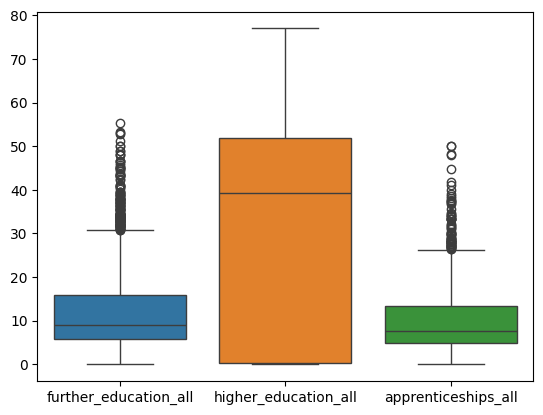

In [ ]:
sns.boxplot(data=percent_cohort_by_la[['further_education_all','higher_education_all','apprenticeships_all']])

A boxplot of 'further_education_all', 'higher_education_all', and 'apprenticeships_all' from 'percent_cohort_by_la' was also generated. 

From these tests it can be seen that the disparity of the data in this breakdown is too great to be utilised for analysis and visualisation. The mean and median of nearly every numerical column in 'total_pupils_by_la' is vastly different. Additionally, the standard deviation, as well as the range between the min and max, is very high. It seems that this aggregation of the data is too granular where some local authorities have few learners while others can have thousands.

In [ ]:
percent_cohort_by_region = destinations_df[
    (destinations_df['data_type'] == 'Percentage') &
    (destinations_df['cohort_level_group'] != 'Total') &
    (destinations_df['breakdown_topic'] == 'Total') &
    (destinations_df['institution_group'] == 'State-funded mainstream schools & colleges') &
    (destinations_df['geographic_level'] == 'Regional') &
    (destinations_df['level_methodology'] == 'Local education authority area') &
    (~destinations_df['region_name'].isin(['Inner London', 'Outer London']))
]

percent_cohort_by_region.describe()

,cohort,positive_dest_all,sustained_education_all,higher_education_all,further_education_all,fe_lvl_3,fe_lvl_2,fe_entry_or_no_lvl,other_education,apprenticeships_all,apps_lvl_4_and_up,apps_lvl_3,apps_lvl_2,employment_all,not_sustained_dest,unknown_all
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,25478.888889,77.098990,42.676768,27.614141,12.611616,4.509091,3.233333,1.964141,2.446970,9.804040,0.351010,4.478283,4.973737,24.620707,16.885859,6.012626
std,18564.598125,13.463789,20.362074,24.838528,6.965063,5.047351,3.530376,2.762857,1.537902,5.043494,0.420145,2.682408,3.161815,6.067959,9.829966,4.027052
min,2106.000000,45.200000,8.300000,0.000000,3.800000,0.000000,0.000000,0.000000,0.300000,1.600000,0.000000,0.700000,0.300000,10.300000,6.100000,1.500000
25%,8821.750000,64.725000,22.275000,0.700000,7.400000,0.000000,0.000000,0.000000,1.700000,5.700000,0.100000,2.500000,2.500000,20.200000,8.325000,3.100000
50%,17682.000000,86.000000,53.350000,41.850000,10.000000,3.200000,1.200000,0.400000,2.400000,7.800000,0.100000,3.650000,3.900000,23.450000,10.650000,4.000000
75%,39846.500000,88.400000,60.800000,50.450000,16.150000,5.875000,6.300000,2.575000,2.900000,14.400000,0.475000,5.475000,7.300000,29.100000,27.025000,8.400000
max,65567.000000,91.200000,72.300000,66.400000,35.400000,23.100000,14.000000,12.400000,16.700000,21.500000,1.600000,13.400000,14.400000,40.300000,40.500000,21.100000


Instead, dataframe 'percent_cohort_by_region' was created to aggregate the data by the percentage of student cohort by region. Similar filters to 'percent_cohort_by_la' was used, with the exception of:

* 'level_methodology' which was set to 'Local education authority area' as there were multiple options for this category when looking at the data by region.
* 'geographic_level' was filtered by 'Regional'.
* 'Inner London' and 'Outer London' was excluded from 'region_name' as this category already contains 'London'.


.describe() was then used to summarise statistics of 'percent_cohort_by_region'.

<AxesSubplot: >

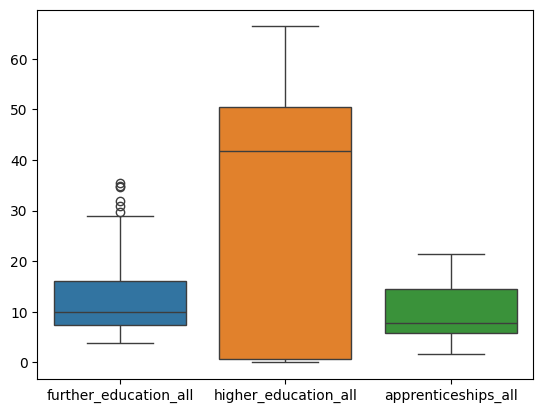

In [ ]:
sns.boxplot(data=percent_cohort_by_region[['further_education_all','higher_education_all','apprenticeships_all']])

A boxplot of 'further_education_all', 'higher_education_all', and 'apprenticeships_all' from 'percent_cohort_by_region' was also generated.

This breakdown of the data proved to be more viable. The mean and median were more aligned. There were also much fewer values outside the upper whisker of the boxplots. The range of 'cohort' is still great but this variability is expected due to the varying population sizes across the regions of England. Hence, the regional breakdown is used for analysis and visualisation.

## Data Visualisation & Analysis

The prepared data was then visualised and analysed for extracting insights on the destinations of 16-18 year old students in England. Most of the colours used were based off the '15-COLOR PALETTE FOR COLORBLINDNESS' from https://mk.bcgsc.ca/colorblind/palettes.mhtml#projecthome

### Distribution of Core Destination Types

The below compares the distribution of pupils for the core destination types of: positive destination, not sustained destination, and unknown destination.

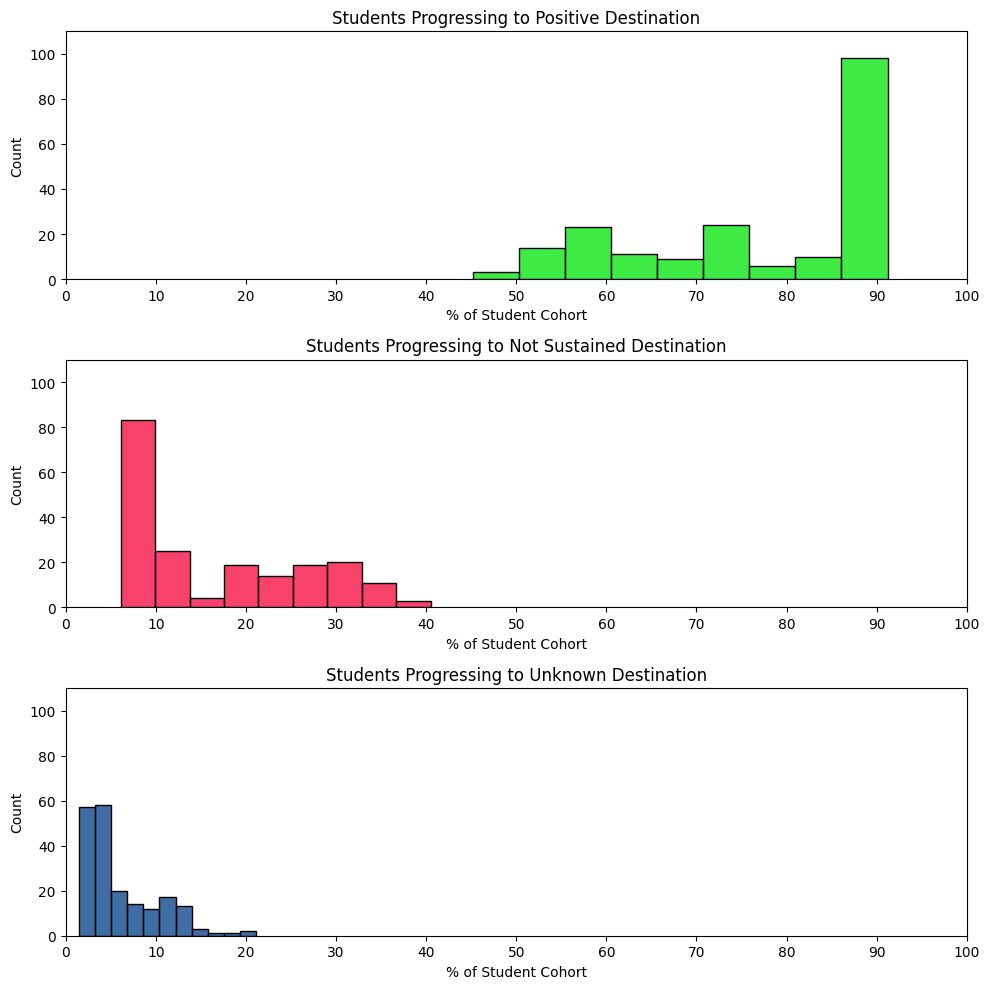

In [ ]:
# Create subplots for each chart
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Create histograms for the core destination types
sns.histplot(data=percent_cohort_by_region['positive_dest_all'], ax=axs[0], color='#00E307')
sns.histplot(data=percent_cohort_by_region['not_sustained_dest'], ax=axs[1], color='#F60239')
sns.histplot(data=percent_cohort_by_region['unknown_all'], ax=axs[2], color='#003C86')

# Set chart titles
axs[0].set_title('Students Progressing to Positive Destination')
axs[1].set_title('Students Progressing to Not Sustained Destination')
axs[2].set_title('Students Progressing to Unknown Destination')

# Set consistent axes for comparability
for ax in axs:
    ax.set_xticks(range(0,101,10))
    ax.set_xlim([0,100])
    ax.set_ylim([0,110])
    ax.set_xlabel('% of Student Cohort')

# Show charts
plt.tight_layout()
plt.show()

This reveals that most students progressed to a positive destination. More specifically, in most regions, over 50% of the student cohort advanced to a positive destination, with the most common percentage falling within the high 80% range.

A smaller, but not insignificant, percentage of students progressed to an unsustained destination, with a high volume of these being just under 10%. There looks to be few unknown destinations by comparison. On the whole, the destinations of 16-18 students in England appears favourable.

### Further Education and Apprenticeship Destinations Timely

Time series line charts were plotted for analysing the trends of learners progressing to further education and apprenticeship destinations over time.

/tmp/ipykernel_414/3613568500.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_fe_dests = percent_cohort_by_region.groupby('time_period')[[


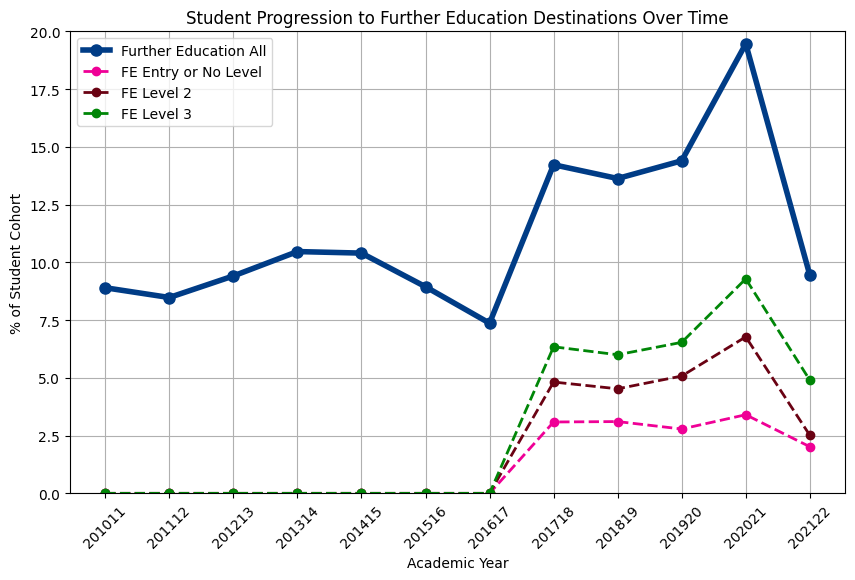

In [ ]:
# Use mean of further education destinations % by academic year
mean_fe_dests = percent_cohort_by_region.groupby('time_period')[[
    'further_education_all', 'fe_entry_or_no_lvl', 'fe_lvl_2', 'fe_lvl_3'
]].mean()

# Plot chart
plt.figure(figsize=(10, 6))

# Plot lines for fe and fe levels destinations
plt.plot(
    mean_fe_dests.index, mean_fe_dests['further_education_all'],
    marker='o', markersize=8, color='#003C86', 
    linewidth=4, label='Further Education All'
)
plt.plot(
    mean_fe_dests.index, mean_fe_dests['fe_entry_or_no_lvl'],
    marker='o', color='#EF0096', linewidth=2, linestyle='dashed',
    label='FE Entry or No Level'
)
plt.plot(
    mean_fe_dests.index, mean_fe_dests['fe_lvl_2'],
    marker='o', color='#6A0213', linewidth=2, linestyle='dashed',
    label='FE Level 2'
)
plt.plot(
    mean_fe_dests.index, mean_fe_dests['fe_lvl_3'],
    marker='o', color='#008607', linewidth=2, linestyle='dashed',
    label='FE Level 3'
)

# Ensure x axis shows all academic years
plt.xticks(mean_fe_dests.index, rotation=45)

# Further chart customisation
plt.xlabel('Academic Year')
plt.ylabel('% of Student Cohort')
plt.ylim(0, 20)
plt.title('Student Progression to Further Education Destinations Over Time')
plt.legend()
plt.grid(True)

# Show chart
plt.show()

The percentage of learners progressing to further education destinations, including levels, over time was charted. 

An immediate observation from the graph is that the level breakdown is unavailable prior to 2017/18. Although not mentioned in the provided data-guidance.txt or the Gov Education Statistics site, there appears to be a fundamental difference in the data for destinations prior to this time, therefore these time periods were analysed separately.

The following insights were unveiled from the chart:
* From 2011/12, learners progressing to further education rose, levelled out at 2014/15, then declined until its trough in 2016/17.
* From 2017/18, there was a slight dip in progression to further education into 2018/19, followed by a modest increase into 2019/20. Following this, further education destinations peaked for all levels in 2020/21 but subsequently fell drastically in 2021/22. This sharp decrease is perhaps attributable to the [negative impact COVID-19 had on UK education](https://www.gov.uk/government/publications/learning-during-the-pandemic/learning-during-the-pandemic-review-of-research-from-england) around this time.
* Analysis of the further education levels indicates similar trends across all levels, with the exception of 'FE Entry or No Level', which experienced a less significant peak in progressions during 2020/21.
* A pattern is noticeable where the percentage of student progressions increases with each level of further education, indicating progression in education as students advance from lower to higher levels throughout the academic years.

/tmp/ipykernel_414/958122092.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_app_dests = percent_cohort_by_region.groupby('time_period')[[


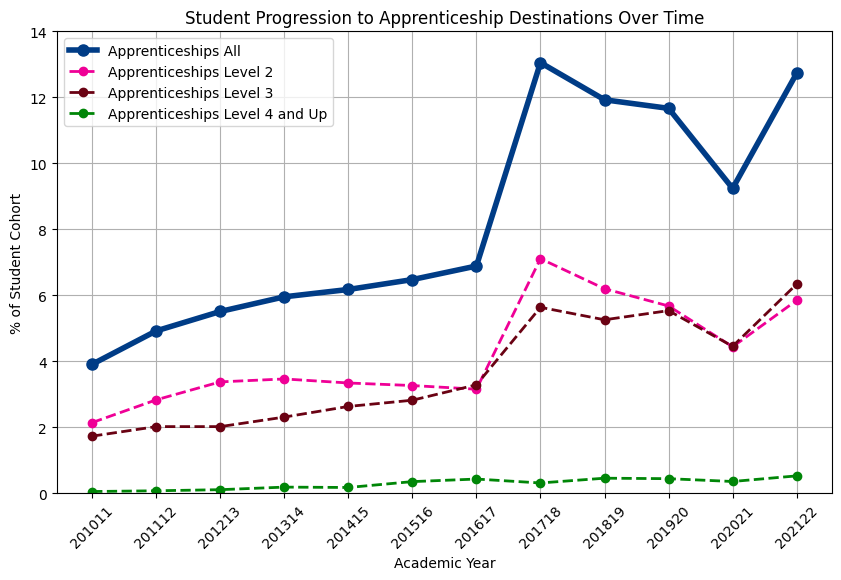

In [ ]:
# Use mean of apprenticeship destinations % by academic year
mean_app_dests = percent_cohort_by_region.groupby('time_period')[[
    'apprenticeships_all', 'apps_lvl_2', 'apps_lvl_3', 'apps_lvl_4_and_up'
]].mean()

# Plot chart
plt.figure(figsize=(10, 6))

# Plot lines for apprenticeship and apprenticeship levels destinations
plt.plot(
    mean_app_dests.index, mean_app_dests['apprenticeships_all'],
    marker='o', markersize=8, color='#003C86', 
    linewidth=4, label='Apprenticeships All'
)
plt.plot(
    mean_app_dests.index, mean_app_dests['apps_lvl_2'],
    marker='o', color='#EF0096', linewidth=2, linestyle='dashed',
    label='Apprenticeships Level 2'
)
plt.plot(
    mean_app_dests.index, mean_app_dests['apps_lvl_3'],
    marker='o', color='#6A0213', linewidth=2, linestyle='dashed',
    label='Apprenticeships Level 3'
)
plt.plot(
    mean_app_dests.index, mean_app_dests['apps_lvl_4_and_up'],
    marker='o', color='#008607', linewidth=2, linestyle='dashed',
    label='Apprenticeships Level 4 and Up'
)

# Ensure x axis shows all academic years
plt.xticks(mean_app_dests.index, rotation=45)

# Further chart customisation
plt.xlabel('Academic Year')
plt.ylabel('% of Student Cohort')
plt.ylim(0, 14)
plt.title('Student Progression to Apprenticeship Destinations Over Time')
plt.legend()
plt.grid(True)

# Show chart
plt.show()

The percentage of learners progressing to apprenticeship destinations, including levels, over time was charted. 

As noted with the previous chart, there is a significant difference with the data prior to 2017/18 and thus will be analysed separately.

The conclusions below were drawn from the chart:
* Starting from 2010/11, overall apprenticeship destination trends increased steadily up to 2016/17.
* From 2017/18, progressions to apprenticeships gradually decreased until 2020/21, particularly from 2019/20 into 2020/21. However, in 2021/22 apprenticeship destinations rose again to around the same point as in 2017/18.
* Analysing the apprenticeship levels revealed that progressions to level 4 remained consistently low throughout the academic years, with only a minor increase on the whole.
* While level 2 apprenticeships saw the highest number of progressions from 2010/11, this trend began to decline from 2013/14 onwards. In contrast, progressions for level 3 apprenticeships continued to rise steadily, surpassing level 2 progressions by 2016/17.
* From 2017/18 onwards, while the majority of progressions were to level 2, both level 2 and level 3 apprenticeship destinations experienced declines, reaching similar levels by 2020/21. However, in 2021/22, progressions for both levels saw an uptake, with level 3s showing a more prominent increase.

### Positive Destinations by LLDD or SEN Status

The cohort of students progressing to positive destinations by LLDD (Learning Difficulties or Disabilities) or SEN (Special Education Needs) status was graphed to compare the outcomes.

In [ ]:
# Create dataframe of breakdown by LLDD and SEN Status
percent_by_region_lldd_sen = destinations_df[
    (destinations_df['data_type'] == 'Percentage') &
    (destinations_df['cohort_level_group'] != 'Total') &
    (destinations_df['breakdown_topic'].isin(['LLDD Provision', 'SEN Provision'])) &
    (destinations_df['geographic_level'] == 'Regional') &
    (destinations_df['level_methodology'] == 'Local education authority area') &
    (~destinations_df['region_name'].isin(['Inner London', 'Outer London']))
]
# Remove the unused categories
percent_by_region_lldd_sen['breakdown'] = percent_by_region_lldd_sen['breakdown'].cat.remove_unused_categories()

/tmp/ipykernel_414/1655843832.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent_by_region_lldd_sen['breakdown'] = percent_by_region_lldd_sen['breakdown'].cat.remove_unused_categories()


A dataframe with similar filtering to 'percent_cohort_by_region' but by LLDD Provision and SEN Provision was created.

/tmp/ipykernel_414/2408540436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=percent_by_region_lldd_sen, x='breakdown', y='positive_dest_all', order=[


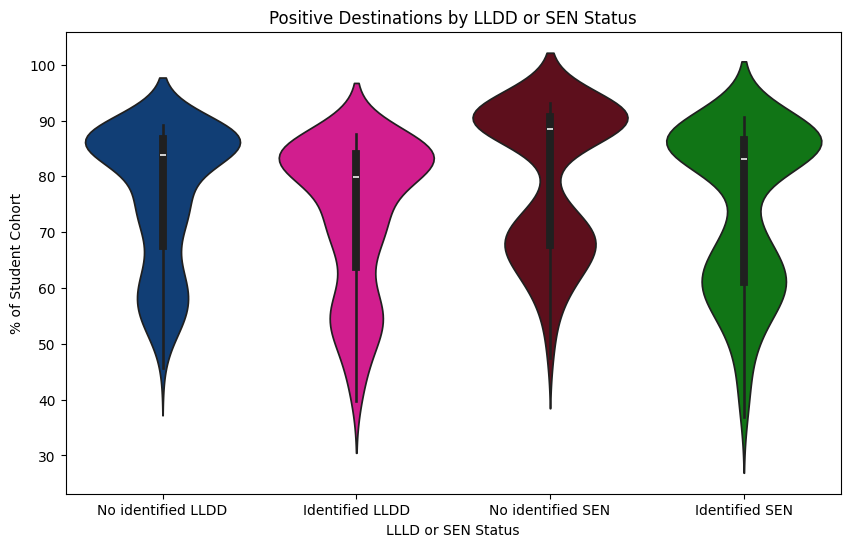

In [ ]:
# Plot chart
plt.figure(figsize=(10, 6))

# Create violin plot of 'percent_by_region_lldd_sen' 
sns.violinplot(data=percent_by_region_lldd_sen, x='breakdown', y='positive_dest_all', order=[
    'No identified LLDD', 'Identified LLDD', 'No identified SEN', 'Identified SEN'
], palette=['#003C86', '#EF0096', '#6A0213', '#008607'])

# Further chart customisation
plt.xlabel('LLLD or SEN Status')
plt.ylabel('% of Student Cohort')
plt.title('Positive Destinations by LLDD or SEN Status')

# Show chart
plt.show()

Each LLDD or SEN status from 'percent_by_region_lldd_sen' was charted as violin plots for comparison.

Comparing the graphs yielded the below insights:
* With each chart, two distinct concentrations of learners progressing to positive destinations were evident, with one group showing a higher percentage and the other a lower percentage.
* The 'Identified SEN' cohort may have had the lowest success, with a significant proportion of its students (around 62%) progressing to a positive destination.
* The 'No Identified SEN' cohort showed a significant concentration of learners achieving the highest percentage of positive destinations (around 90%). Although, it also included a notable proportion of learners with a lower percentage of positive destinations (around 65%).
* The 'No identified LLDD' could be considered the most favourable cohort, where the vast majority of its students progressed to positive destinations (around 87%).
* Overall, pupils without an LLDD or SEN status were more likely to progress to a positive destination than those with one.

### Positive Destination Types by Region

The positive destination types were plotted as choropleth map charts to gauge the distribution across the regions of England.

In [ ]:
shape_file = '/work/Regions_December_2022_Boundaries_EN_BFC_V2_-7709264064271310496.geojson'
eng_regions = gpd.read_file(shape_file)

The geojson file for english regions was imported as 'eng_regions'.

In [ ]:
# Merge dataframes
percent_by_region_geomap = eng_regions.merge(
    percent_cohort_by_region,
    how='inner',
    left_on='RGN22CD',
    right_on='region_code'
)

percent_by_region_geomap.head(10) # Preview top 10 rows

,FID,RGN22CD,RGN22NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,time_period,...,fe_lvl_2,fe_entry_or_no_lvl,other_education,apprenticeships_all,apps_lvl_4_and_up,apps_lvl_3,apps_lvl_2,employment_all,not_sustained_dest,unknown_all
0,1,E12000001,North East,417314,600356,-1.72888,55.29701,fc91c951-1c1f-447e-8066-cf116ecf14fe,"MULTIPOLYGON (((450254.000 525947.300, 450261....",201011,...,0.0,0.0,3.4,6.3,0.0,3.1,3.2,18.2,12.0,2.0
1,1,E12000001,North East,417314,600356,-1.72888,55.29701,fc91c951-1c1f-447e-8066-cf116ecf14fe,"MULTIPOLYGON (((450254.000 525947.300, 450261....",201112,...,0.0,0.0,2.5,7.2,0.0,3.6,3.6,17.1,11.6,1.6
2,1,E12000001,North East,417314,600356,-1.72888,55.29701,fc91c951-1c1f-447e-8066-cf116ecf14fe,"MULTIPOLYGON (((450254.000 525947.300, 450261....",201213,...,0.0,0.0,2.3,8.3,0.0,3.6,4.6,18.0,12.5,1.7
3,1,E12000001,North East,417314,600356,-1.72888,55.29701,fc91c951-1c1f-447e-8066-cf116ecf14fe,"MULTIPOLYGON (((450254.000 525947.300, 450261....",201314,...,0.0,0.0,2.9,8.8,0.1,4.1,4.6,17.7,10.5,1.5
4,1,E12000001,North East,417314,600356,-1.72888,55.29701,fc91c951-1c1f-447e-8066-cf116ecf14fe,"MULTIPOLYGON (((450254.000 525947.300, 450261....",201415,...,0.0,0.0,1.9,9.5,0.1,4.7,4.8,16.6,10.3,2.3
5,1,E12000001,North East,417314,600356,-1.72888,55.29701,fc91c951-1c1f-447e-8066-cf116ecf14fe,"MULTIPOLYGON (((450254.000 525947.300, 450261....",201516,...,0.0,0.0,1.8,9.5,0.2,4.2,5.1,17.4,8.3,2.6
6,1,E12000001,North East,417314,600356,-1.72888,55.29701,fc91c951-1c1f-447e-8066-cf116ecf14fe,"MULTIPOLYGON (((450254.000 525947.300, 450261....",201617,...,0.0,0.0,2.3,10.0,0.3,4.9,4.7,17.3,8.6,3.4
7,1,E12000001,North East,417314,600356,-1.72888,55.29701,fc91c951-1c1f-447e-8066-cf116ecf14fe,"MULTIPOLYGON (((450254.000 525947.300, 450261....",201718,...,3.8,4.4,1.2,19.6,0.1,5.1,14.4,18.7,35.4,14.6
8,1,E12000001,North East,417314,600356,-1.72888,55.29701,fc91c951-1c1f-447e-8066-cf116ecf14fe,"MULTIPOLYGON (((450254.000 525947.300, 450261....",201718,...,7.6,1.8,1.3,19.8,0.1,10.9,8.8,27.8,23.3,7.1
9,1,E12000001,North East,417314,600356,-1.72888,55.29701,fc91c951-1c1f-447e-8066-cf116ecf14fe,"MULTIPOLYGON (((450254.000 525947.300, 450261....",201718,...,1.3,0.3,1.3,11.1,0.7,5.4,5.0,18.4,8.8,3.6


'eng_regions' was merged with 'percent_cohort_by_region' via the region codes.

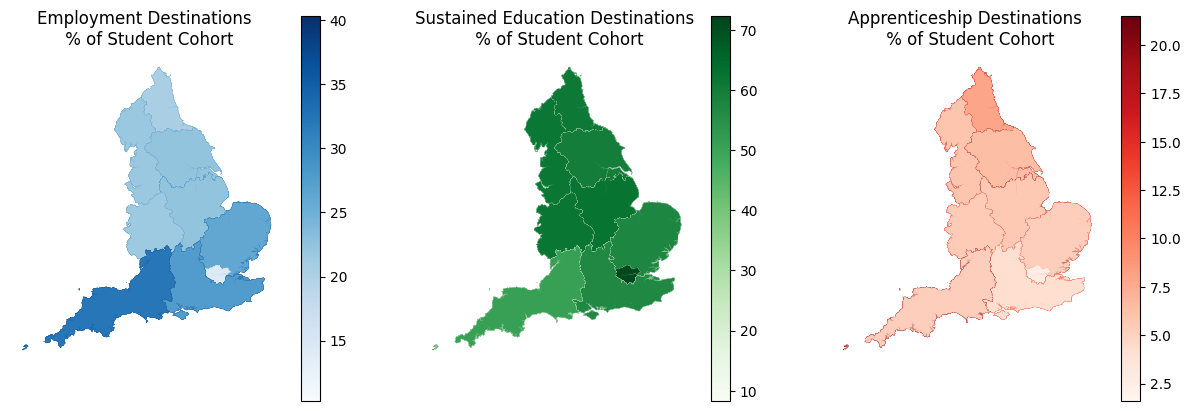

In [ ]:
# Create subplots for each chart
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Create choropleth map for each positive destination type
percent_by_region_geomap.plot(column='employment_all', cmap='Blues', legend=True, ax=axs[0])
percent_by_region_geomap.plot(column='sustained_education_all', cmap='Greens', legend=True, ax=axs[1])
percent_by_region_geomap.plot(column='apprenticeships_all', cmap='Reds', legend=True, ax=axs[2])

# Hide axes
for ax in axs:
    ax.axis('off')

# Set chart titles
axs[0].set_title('Employment Destinations \n % of Student Cohort')
axs[1].set_title('Sustained Education Destinations \n % of Student Cohort')
axs[2].set_title('Apprenticeship Destinations \n % of Student Cohort')

# Show charts
plt.show()

Employment, sustained education, and apprenticeship destinations were charted as choropleth maps. Different colours were used for each chart since their axes differ.

The following insights can be surmised from this:
* South England had the highest concentration of learners progressing to employment, particularly in the South West (around 30%). London was the exception to this, instead having the lowest concentration (around 10%).
* London had the highest concentration of students progressing to sustained education (around 70%), while South West England had the least (around 40%).
* London and South West England could be considered inverses due to their opposing trends of employment and sustained education destinations.
* The learners progressing to apprenticeships proved to be a consistently low percentage across the England regions. The only outlier is North East England having a slightly higher concentration (around 12%) compared to the other regions.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52f6bd8f-7577-45e0-ab4c-65edac7eda3e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>